In [1]:
import matplotlib.pyplot as plt 
def make_plot(pca, X):
    W = pca.components_
    Z = pca.transform(X)

    # visualize the subspace spanned by W
    grid = np.linspace(min(X[:,0])-.3,max(X[:,0])+.3,1000)
    gridplot = (grid-pca.mean_[0])/W[0,0]*W[0,1]+pca.mean_[1]

    # visualize the reconstructions
    Xhat = pca.inverse_transform(Z)
    # xhat = Z@W + pca.mean_ # the same

    plt.scatter(X[:,0],X[:,1], label="original data")
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$');
    plt.plot(grid, gridplot, 'black', label="model")
    plt.scatter(Xhat[:,0],Xhat[:,1], c='red', label="reconstructions")
    plt.axis('equal');
    
    for i in range (X.shape[0]):
        plt.plot((X[i,0],Xhat[i,0]),(X[i,1],Xhat[i,1]), 'red')
    
    plt.legend()

In [2]:
import numpy as np 


raw = np.array([
    np.array([0, 2, 0]),
    np.array([3, -4, 3]),
    np.array([1, 0, 1]),
    np.array([-1, 4, -1]),
    np.array([2, -2, 2]),
])

raw

array([[ 0,  2,  0],
       [ 3, -4,  3],
       [ 1,  0,  1],
       [-1,  4, -1],
       [ 2, -2,  2]])

In [3]:
column_means = np.mean(raw, axis=0)
column_means

array([1., 0., 1.])

In [4]:
centered = raw - column_means

centered

array([[-1.,  2., -1.],
       [ 2., -4.,  2.],
       [ 0.,  0.,  0.],
       [-2.,  4., -2.],
       [ 1., -2.,  1.]])

In [5]:
k = 1
U,s,Vh = np.linalg.svd(centered)

Vh

array([[ 0.40824829, -0.81649658,  0.40824829],
       [-0.91287093, -0.36514837,  0.18257419],
       [-0.        , -0.4472136 , -0.89442719]])

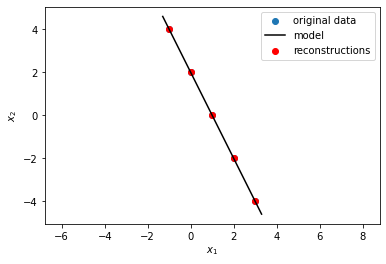

In [6]:
from sklearn.decomposition import PCA

k = 1
pca = PCA(n_components=k)
pca.fit(raw);

make_plot(pca, raw)

In [11]:
W = pca.components_
W

array([[ 0.40824829, -0.81649658,  0.40824829]])

In [15]:
W @ W.T

array([[1.]])

In [18]:
X_t = np.array([0.5, -3, 0.5])
Z = X_t @ W.T

Z

array([2.85773803])

In [23]:
from numpy.linalg import norm
v = Z @ W - X_t

norm(v)

1.154700538379252

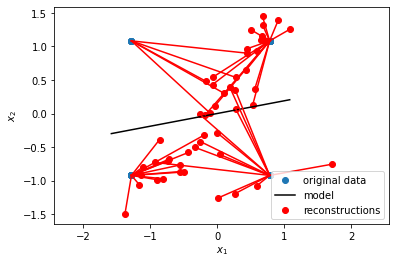

In [30]:
from utils import load_dataset
import utils 

data = load_dataset("animals.pkl")
X_train = data["X"]
animal_names = data["animals"]
trait_names = data["traits"]

# Standardize features
X_train_standardized, mu, sigma = utils.standardize_cols(X_train)
n, d = X_train_standardized.shape


pca = PCA(n_components=10)
pca.fit(X_train_standardized);

make_plot(pca, X_train_standardized)

In [31]:
print(pca.explained_variance_ratio_.cumsum())


[0.17206878 0.30193815 0.38779249 0.44860364 0.50590163 0.54727698
 0.58539896 0.61760354 0.64897697 0.67763182]
